# **Neural Networks**
part 4: classification

### **Changes**
- implemented cross-entropy and its derivative
- loss functions and activations as classes
- implemented Softmax, ReLU, LeakyReLU, Tanh activation functions
- F1 measure per class and macro
- one-hot encoding

### **Imports**

In [36]:
import time

import pandas as pd

from network.activations import LeakyReLU, ReLU, Sigmoid, Softmax, ActivationFunction, Identity
from network.losses import LossCrossEntropy, LossMSE, LossFunction
from visualization.visualization import run_classification
from tabulate import tabulate


In [37]:
rings3_regular_train = pd.read_csv("./data/classification/rings3-regular-training.csv")
rings3_regular_test = pd.read_csv("./data/classification/rings3-regular-test.csv")

easy_train = pd.read_csv("./data/classification/easy-training.csv")
easy_test = pd.read_csv("./data/classification/easy-test.csv")

xor3_train = pd.read_csv("./data/classification/xor3-training.csv")
xor3_test = pd.read_csv("./data/classification/xor3-test.csv")

### **With softmax**


#### **Dataset: RINGS3**

Dataset overview.


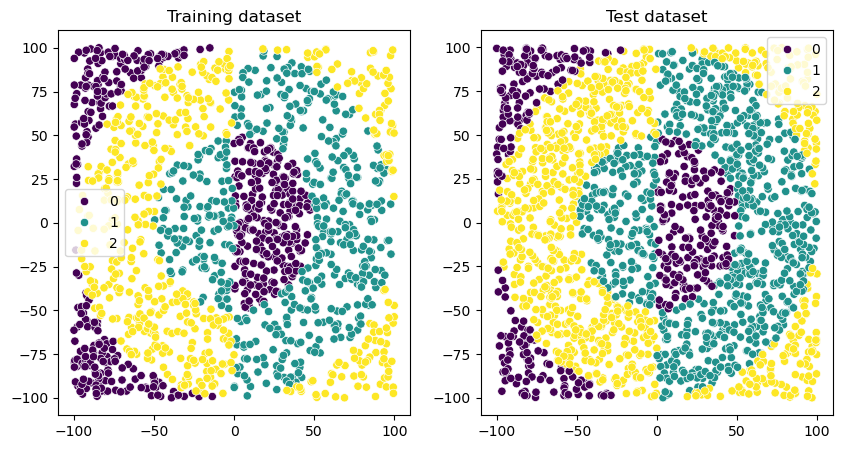

Training network.
Epoch:	0	Loss (Cross Entropy):		1.3931	F1 Score:	0.2832
Epoch:	100	Loss (Cross Entropy):		0.7929	F1 Score:	0.4380
Final epoch:	171	Loss (Cross Entropy):		0.5993	F1 Score:	0.7609
Training results.


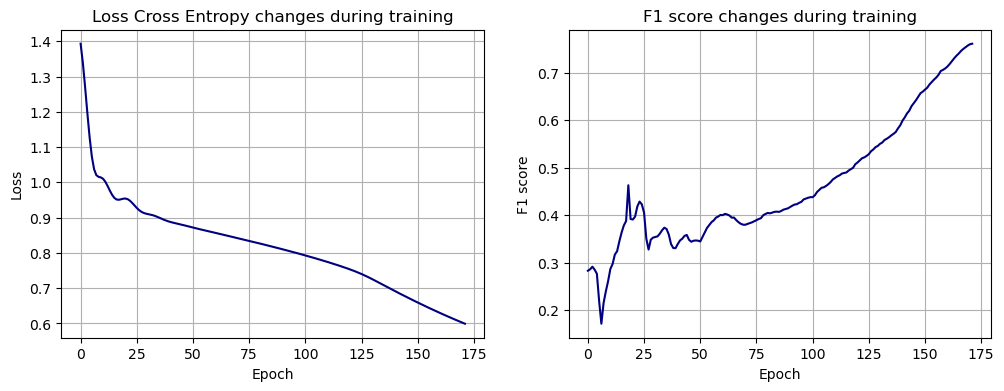

F-Measure on TEST dataset: 0.7660

Results.


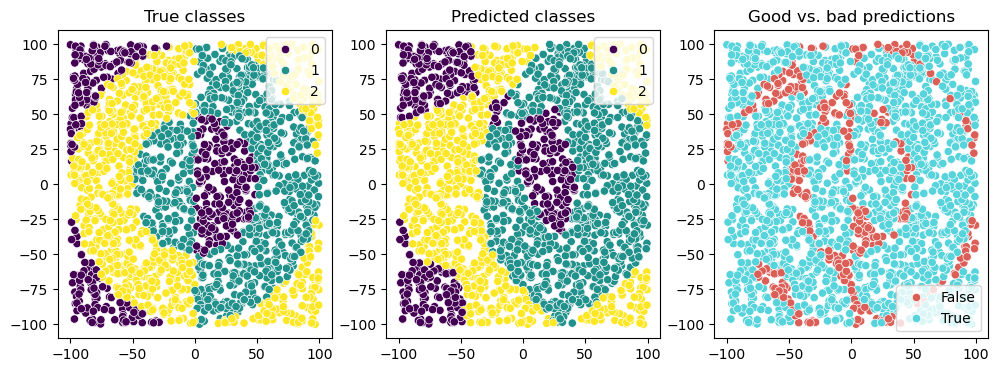

In [38]:
rings_soft = run_classification(train = rings3_regular_train,
                   test = rings3_regular_test,
                   layers_init=[
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 3, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs=1000,
                   learning_rate=0.05,
                   method="momentum",
                   stop_f1=0.76,
                   scaling=True,
                   random_state=42)

#### **Dataset: EASY**


Dataset overview.


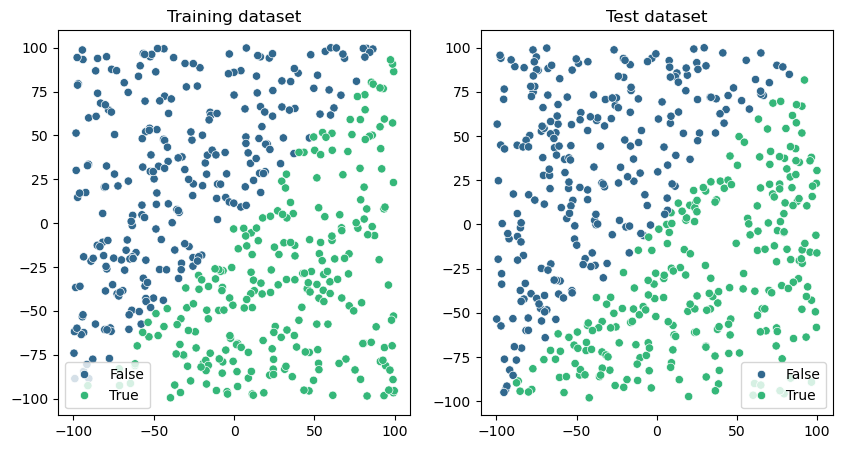

Training network.
Epoch:	0	Loss (Cross Entropy):		0.7531	F1 Score:	0.3333
Epoch:	10	Loss (Cross Entropy):		0.6721	F1 Score:	0.6214
Epoch:	20	Loss (Cross Entropy):		0.6398	F1 Score:	0.6262
Epoch:	30	Loss (Cross Entropy):		0.5814	F1 Score:	0.6931
Epoch:	40	Loss (Cross Entropy):		0.4852	F1 Score:	0.7350
Epoch:	50	Loss (Cross Entropy):		0.3609	F1 Score:	0.7927
Epoch:	60	Loss (Cross Entropy):		0.2301	F1 Score:	0.8637
Epoch:	70	Loss (Cross Entropy):		0.0979	F1 Score:	0.9800
Epoch:	80	Loss (Cross Entropy):		0.0642	F1 Score:	0.9760
Epoch:	90	Loss (Cross Entropy):		0.0455	F1 Score:	0.9900
Final epoch:	99	Loss (Cross Entropy):		0.0370	F1 Score:	0.9960
Training results.


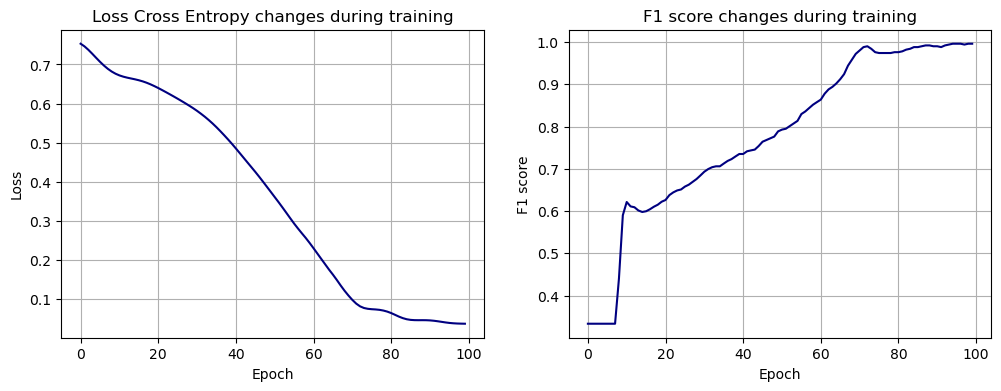

F-Measure on TEST dataset: 0.9920

Results.


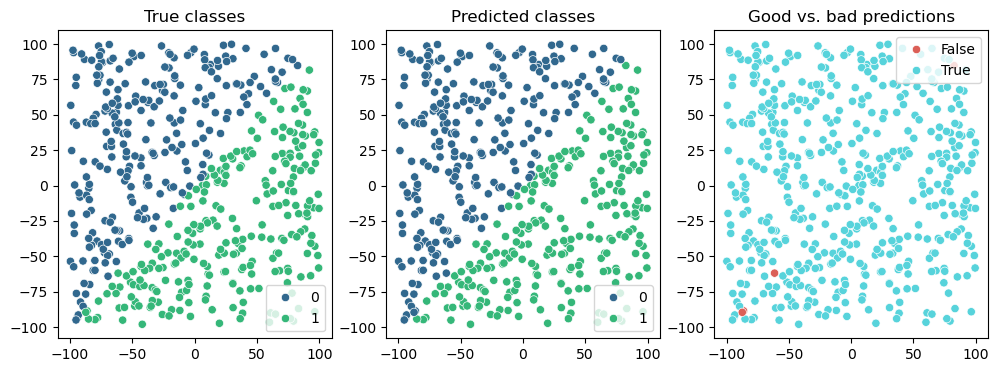

In [39]:
easy_soft = run_classification(train = easy_train,
                   test = easy_test,
                   layers_init=[
                                {"output_size": 5, "activation": ReLU(), "init": "he_normal"},
                                {"output_size": 5, "activation": ReLU(), "init": "he_normal"},
                                {"output_size": 2, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs=100,
                   learning_rate=0.04,
                   method="momentum",
                   stop_f1=1.0,
                   scaling=True,
                   random_state=42)

#### **Dataset: XOR3**

Dataset overview.


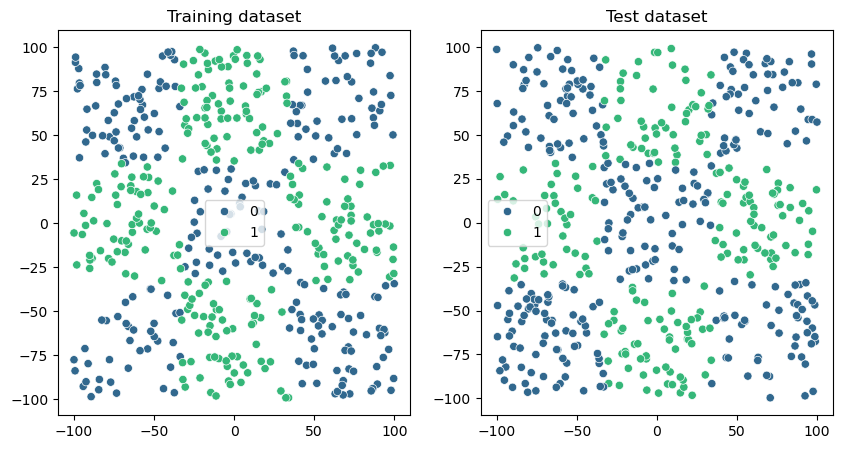

Training network.
Epoch:	0	Loss (Cross Entropy):		0.7649	F1 Score:	0.5884
Epoch:	1000	Loss (Cross Entropy):		0.0043	F1 Score:	1.0000
Final epoch:	1499	Loss (Cross Entropy):		0.0024	F1 Score:	1.0000
Training results.


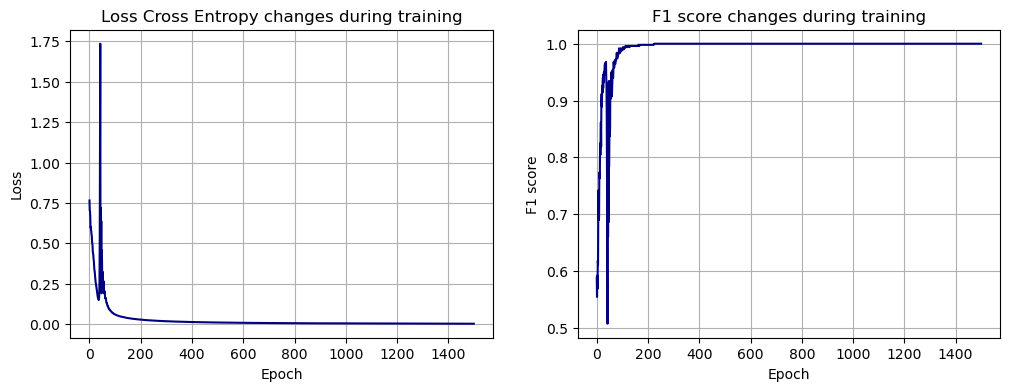

F-Measure on TEST dataset: 0.9652

Results.


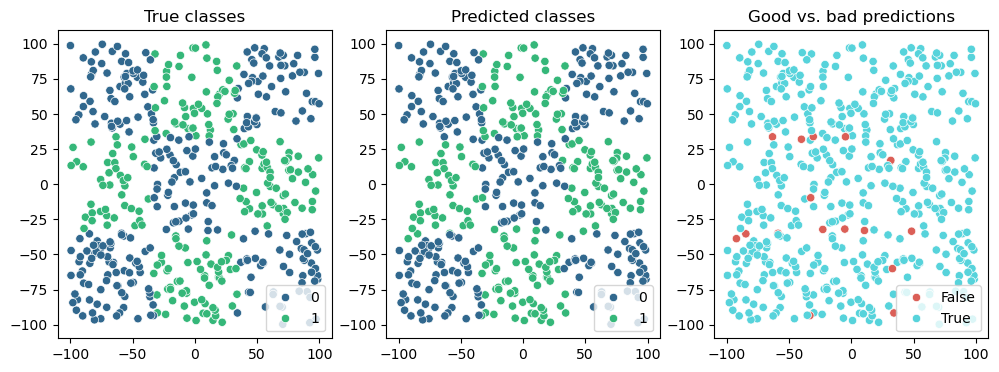

In [40]:
xor_soft = run_classification(train = xor3_train,
                   test = xor3_test,
                   layers_init=[
                                {"output_size": 50, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 50, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 50, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 2, "activation": Softmax(), "init": "xavier_normal"}],
                   loss_function=LossCrossEntropy(),
                   epochs=1500,
                   learning_rate=0.057,
                   method="momentum",
                   scaling=True,
                   batch_size=32,
                   random_state=42)

### **Without Softmax**

#### **Dataset: RINGS3**

Dataset overview.


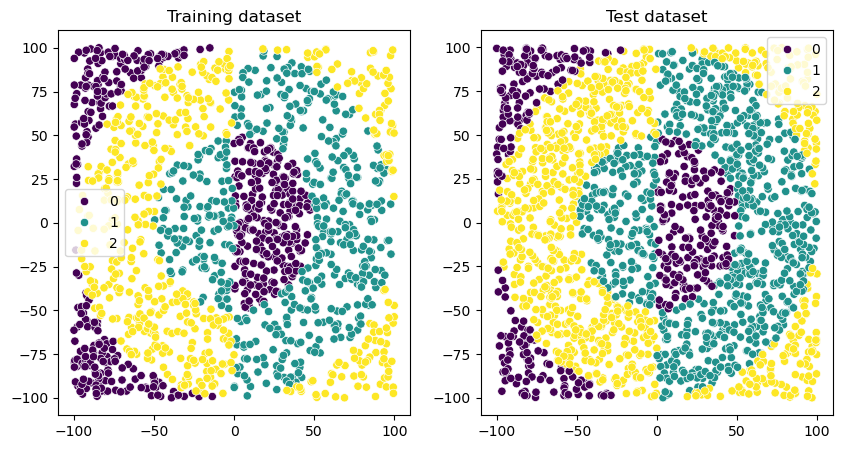

Training network.
Epoch:	0	Loss (MSE):		3.0648	F1 Score:	0.4121
Epoch:	100	Loss (MSE):		0.3573	F1 Score:	0.6855
Final epoch:	124	Loss (MSE):		0.2901	F1 Score:	0.7655
Training results.


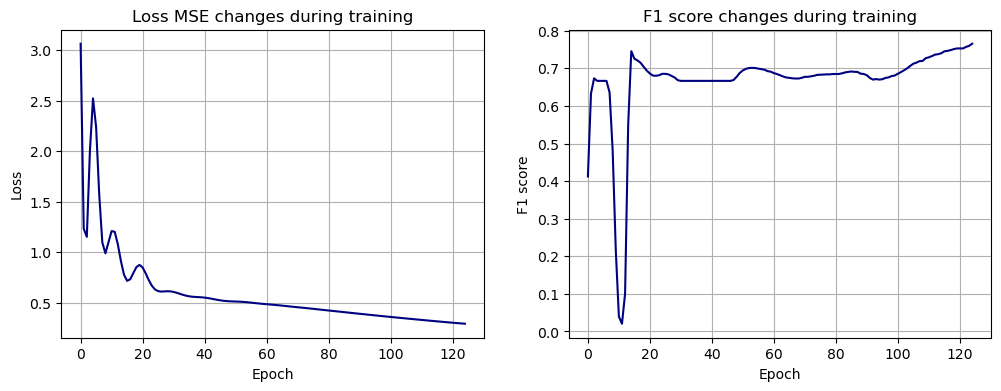

F-Measure on TEST dataset: 0.8516

Results.


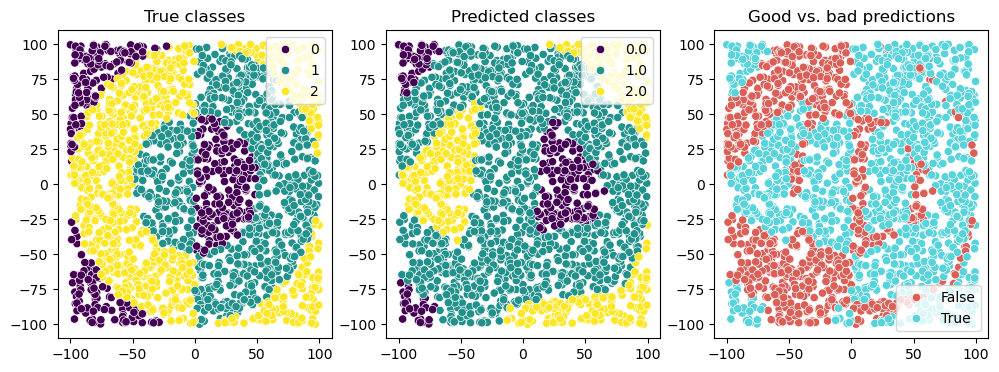

In [41]:
rings_nosoft = run_classification(train = rings3_regular_train,
                   test = rings3_regular_test,
                   layers_init=[
                                {"output_size": 10, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 1, "activation": Identity(), "init": "xavier_normal"}],
                   loss_function=LossMSE(f1_score=True),
                   epochs=1000,
                   learning_rate=0.05,
                   method="momentum",
                   stop_f1=0.76,
                   scaling=True,
                   random_state=42)

Dataset overview.


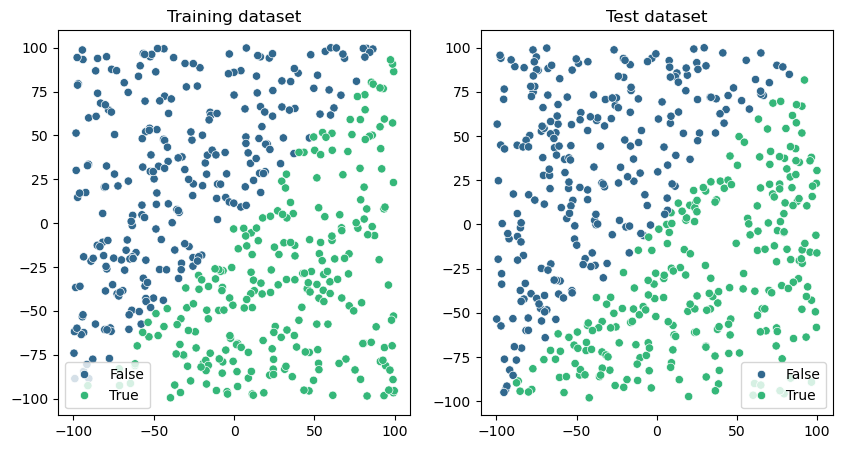

Training network.
Epoch:	0	Loss (MSE):		0.2717	F1 Score:	0.2719
Epoch:	100	Loss (MSE):		0.2202	F1 Score:	0.7214
Epoch:	200	Loss (MSE):		0.1323	F1 Score:	0.8404
Epoch:	300	Loss (MSE):		0.0509	F1 Score:	0.9663
Epoch:	400	Loss (MSE):		0.0192	F1 Score:	0.9879
Epoch:	500	Loss (MSE):		0.0133	F1 Score:	0.9940
Epoch:	600	Loss (MSE):		0.0113	F1 Score:	0.9940
Epoch:	700	Loss (MSE):		0.0101	F1 Score:	0.9940
Epoch:	800	Loss (MSE):		0.0092	F1 Score:	0.9940
Epoch:	900	Loss (MSE):		0.0085	F1 Score:	0.9940
Final epoch:	999	Loss (MSE):		0.0080	F1 Score:	0.9940
Training results.


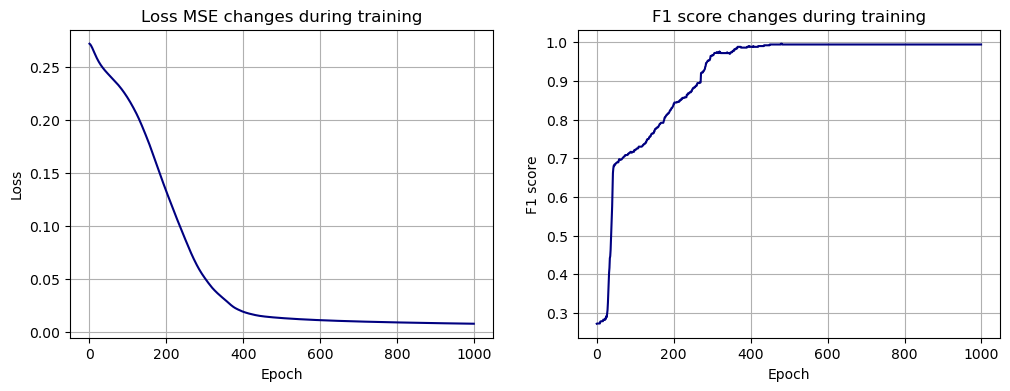

F-Measure on TEST dataset: 0.9940

Results.


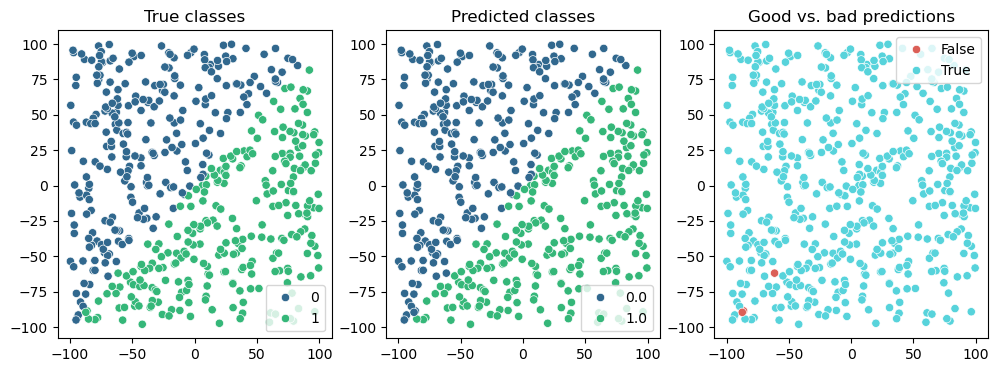

In [42]:
easy_nosoft = run_classification(train = easy_train,
                   test = easy_test,
                   layers_init=[
                                {"output_size": 5, "activation": ReLU(), "init": "he_normal"},
                                {"output_size": 5, "activation": ReLU(), "init": "he_normal"},
                                {"output_size": 1, "activation": Sigmoid(), "init": "xavier_normal"}],
                   loss_function=LossMSE(f1_score=True),
                   epochs=1000,
                   learning_rate=0.04,
                   method="momentum",
                   stop_f1=1.0,
                   scaling=True,
                   random_state=42)

#### **Dataset: XOR3**

Dataset overview.


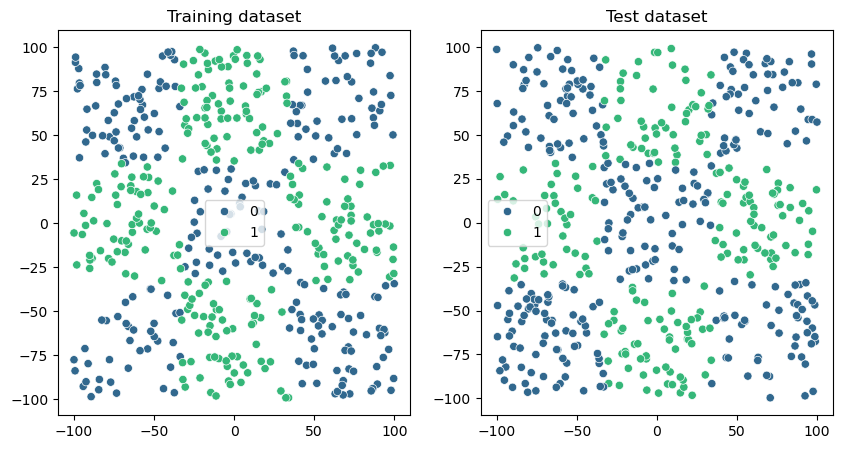

Training network.
Epoch:	0	Loss (MSE):		0.3073	F1 Score:	0.5149
Epoch:	100	Loss (MSE):		0.0565	F1 Score:	0.9661
Epoch:	200	Loss (MSE):		0.0311	F1 Score:	0.9840
Epoch:	300	Loss (MSE):		0.0225	F1 Score:	0.9920
Epoch:	400	Loss (MSE):		0.0176	F1 Score:	0.9940
Epoch:	500	Loss (MSE):		0.0144	F1 Score:	0.9940
Epoch:	600	Loss (MSE):		0.0122	F1 Score:	0.9940
Epoch:	700	Loss (MSE):		0.0104	F1 Score:	0.9940
Epoch:	800	Loss (MSE):		0.0091	F1 Score:	0.9980
Epoch:	900	Loss (MSE):		0.0081	F1 Score:	0.9980
Final epoch:	999	Loss (MSE):		0.0072	F1 Score:	0.9980
Training results.


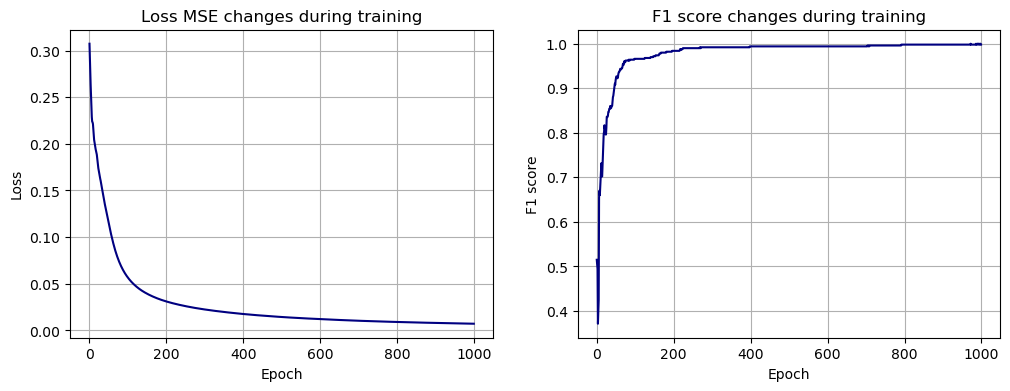

F-Measure on TEST dataset: 0.9420

Results.


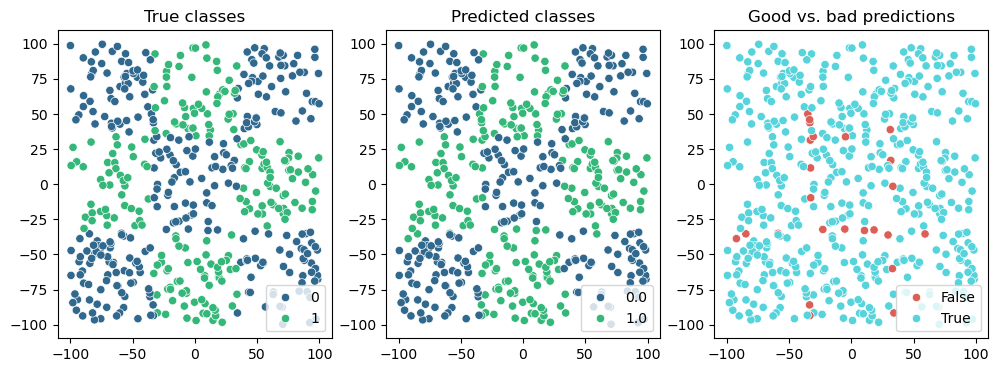

In [43]:
xor_nosoft = run_classification(train = xor3_train,
                   test = xor3_test,
                   layers_init=[
                                {"output_size": 50, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 50, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 50, "activation": LeakyReLU(), "init": "he_normal"},
                                {"output_size": 1, "activation": Sigmoid(), "init": "xavier_normal"}],
                   loss_function=LossMSE(f1_score=True),
                   epochs=1000,
                   learning_rate=0.06,
                   method="momentum",
                   scaling=True,
                   random_state=42)

### **Summary**

In [44]:
summary = [
    ["RINGS3", "Softmax", rings_soft['number_of_epochs'], rings_soft['training_time'], rings_soft['final_f1_train'], rings_soft['f1_test'], type(rings_soft['loss_func']).__name__, rings_soft['final_loss_train']],
    ["RINGS3", "No Softmax", rings_nosoft['number_of_epochs'], rings_nosoft['training_time'], rings_nosoft['final_f1_train'], rings_nosoft['f1_test'], type(rings_nosoft['loss_func']).__name__, rings_nosoft['final_loss_train']],
    ["EASY", "Softmax", easy_soft['number_of_epochs'], easy_soft['training_time'], easy_soft['final_f1_train'], easy_soft['f1_test'], type(easy_soft['loss_func']).__name__, easy_soft['final_loss_train']],
    ["EASY", "No Softmax", easy_nosoft['number_of_epochs'], easy_nosoft['training_time'], easy_nosoft['final_f1_train'], easy_nosoft['f1_test'], type(easy_nosoft['loss_func']).__name__, easy_nosoft['final_loss_train']],
    ["XOR3", "Softmax", xor_soft['number_of_epochs'], xor_soft['training_time'], xor_soft['final_f1_train'], xor_soft['f1_test'], type(xor_soft['loss_func']).__name__, xor_soft['final_loss_train']],
    ["XOR3", "No Softmax", xor_nosoft['number_of_epochs'], xor_nosoft['training_time'], xor_nosoft['final_f1_train'], xor_nosoft['f1_test'], type(xor_nosoft['loss_func']).__name__, xor_nosoft['final_loss_train']],
]

headers = ["Dataset", "Softmax", "Epochs", "Training Time (s)", "Final F1 (Train)", "F1 (Test)", "Loss Function", "Final Loss"]

print(tabulate(summary, headers=headers, floatfmt=".4f", tablefmt="grid"))

+-----------+------------+----------+---------------------+--------------------+-------------+------------------+--------------+
| Dataset   | Softmax    |   Epochs |   Training Time (s) |   Final F1 (Train) |   F1 (Test) | Loss Function    |   Final Loss |
+===========+============+==========+=====================+====================+=============+==================+==============+
| RINGS3    | Softmax    |      172 |              0.0836 |             0.7609 |      0.7660 | LossCrossEntropy |       0.5993 |
+-----------+------------+----------+---------------------+--------------------+-------------+------------------+--------------+
| RINGS3    | No Softmax |      125 |              0.0300 |             0.7655 |      0.8516 | LossMSE          |       0.2901 |
+-----------+------------+----------+---------------------+--------------------+-------------+------------------+--------------+
| EASY      | Softmax    |      100 |              0.0247 |             0.9960 |      0.9920 | Lo